# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/student-data.csv")

In [ ]:
# Create binary target variable
df["pass"] = (df["G3"] >= 10).astype(int)
df["pass"].value_counts()

pass
1    265
0    130
Name: count, dtype: int64

In [3]:
# Feature Selection
features = ["studytime", "absences", "G1", "G2"]
X = df[features].values
y = df["pass"].values



In [4]:
# Test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Feature Scaling
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled  = (X_test - X_mean) / X_std

In [6]:
# Initialize parameters

m, n = X_train_scaled.shape
weights = np.zeros(n)
bias = 0

In [7]:
# Sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# Prediction function

def predict_proba(X, w, b):
    return sigmoid(np.dot(X, w) + b)

In [10]:
# Log-loss function

def compute_loss(y, y_pred):
    epsilon = 1e-9
    m = len(y)
    loss = -(1/m) *np.sum(
        y * np.log(y_pred + epsilon) +
        (1 - y) * np.log(1 - y_pred + epsilon)
    )
    return loss

In [11]:
# Gradient Descent

def gradient_descent(X, y, w, b, lr, iterations):
    m = len(y)
    loss_history = []

    for i in range(iterations):
        y_pred = predict_proba(X, w, b)
        
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        w = w - lr * dw
        b = b - lr * db
        
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
    return w, b, loss_history

In [12]:
# Model Training
weights, bias, loss_history = gradient_descent(
    X_train_scaled,
    y_train,
    weights,
    bias,
    lr=0.01,
    iterations=2000
)

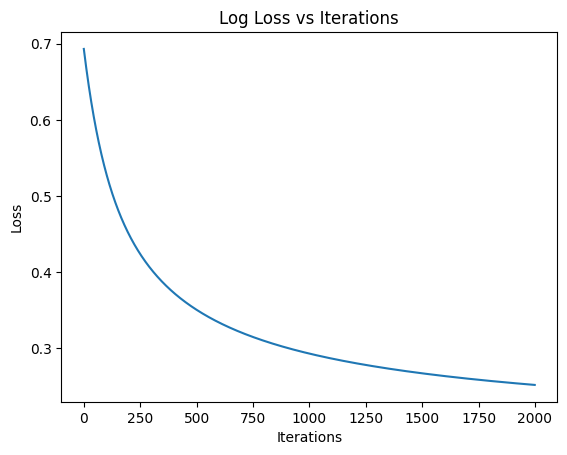

In [13]:
# Plot Loss Curve

plt.figure()
plt.plot(loss_history)
plt.title("Log Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [14]:
# Make Predictions
y_test_pred_proba = predict_proba(X_test_scaled, weights, bias)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

In [15]:
# Evaluate Model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

accuracy, conf_matrix

(0.8860759493670886,
 array([[24,  3],
        [ 6, 46]]))